<a href="https://colab.research.google.com/github/gankidisaicharan/Crop-Recommendation-System/blob/main/Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crop_recommendation

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PROJECTS/Crop Recommendation system using ML/Dataset/Crop_recommendation.csv")

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
print("Number of various crops: ", len(data['label'].unique()))
print("List of crops: ", data['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
print(data['N'].describe())

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<ipython-input-52-6e229399d7b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


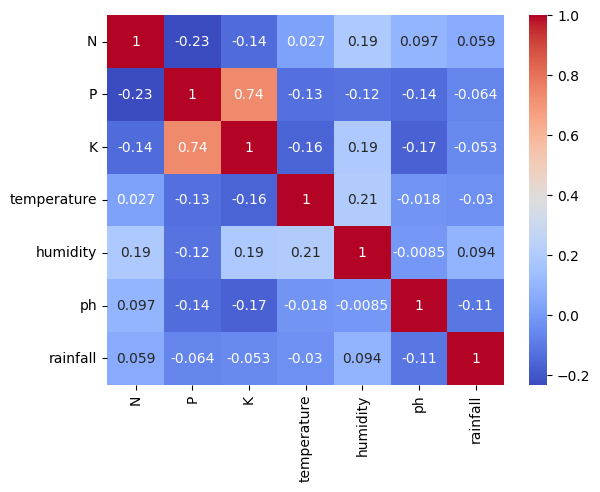

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data.corr()

<ipython-input-53-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
data['label'] = pd.Categorical(data['label'])

In [ ]:
data[['N', 'P', 'K']] = data[['N', 'P', 'K']].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   float64 
 1   P            2200 non-null   float64 
 2   K            2200 non-null   float64 
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(7)
memory usage: 123.3 KB


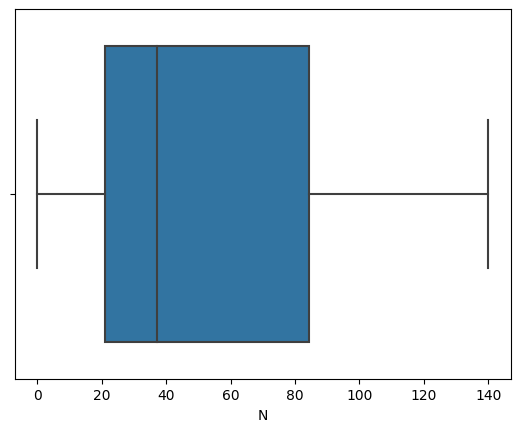

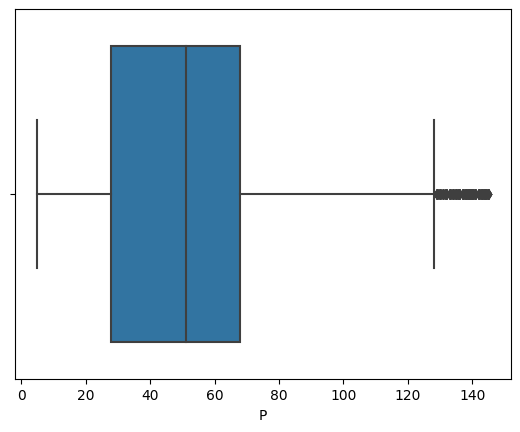

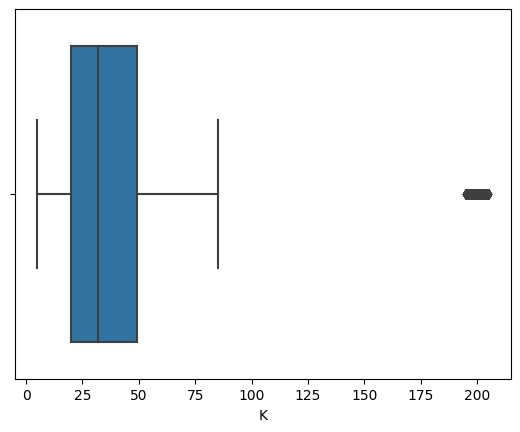

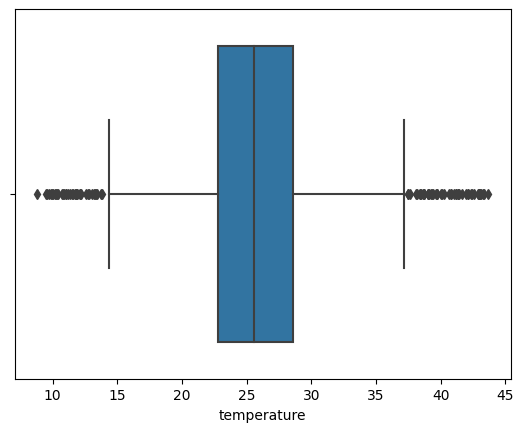

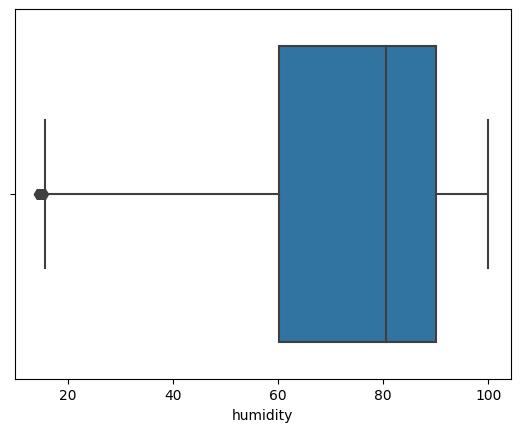

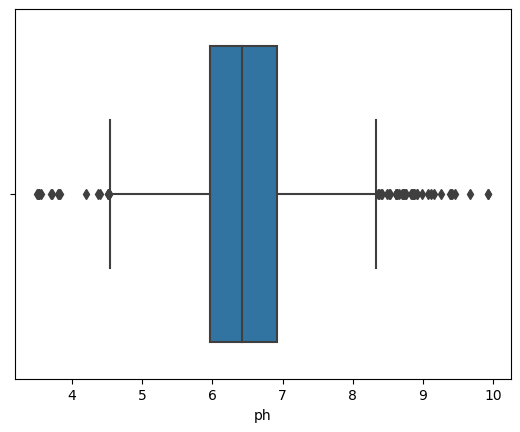

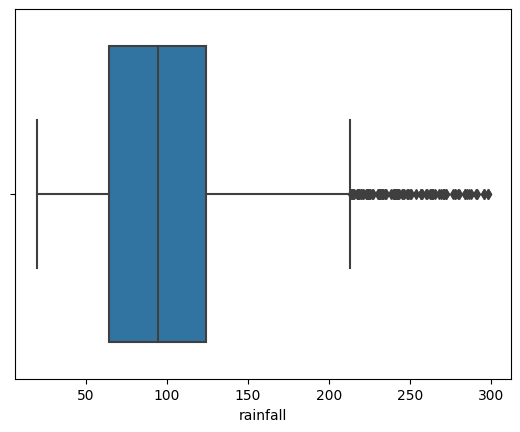

In [ ]:
def remove_outliers(column):
    Q1 = column.quantile(0.01)
    Q3 = column.quantile(0.99)
    return column.clip(lower=Q1, upper=Q3)

sns.boxplot(x=data['N'])
plt.show()

sns.boxplot(x=data['P'])
plt.show()

sns.boxplot(x=data['K'])
plt.show()

sns.boxplot(x=data['temperature'])
plt.show()

sns.boxplot(x=data['humidity'])
plt.show()

sns.boxplot(x=data['ph'])
plt.show()

sns.boxplot(x=data['rainfall'])
plt.show()

# Remove outliers in each attribute using the remove_outliers function
data['N'] = remove_outliers(data['N'])
data['P'] = remove_outliers(data['P'])
data['K'] = remove_outliers(data['K'])
data['temperature'] = remove_outliers(data['temperature'])
data['humidity'] = remove_outliers(data['humidity'])
data['ph'] = remove_outliers(data['ph'])
data['rainfall'] = remove_outliers(data['rainfall'])


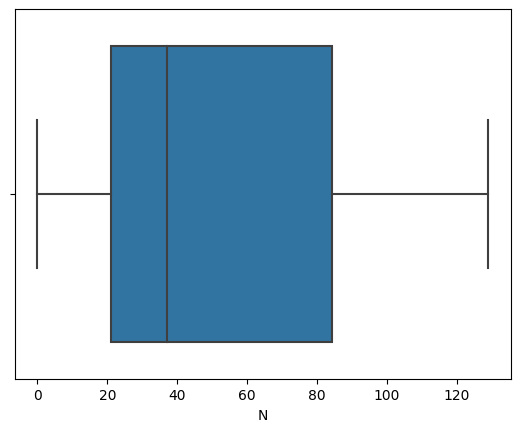

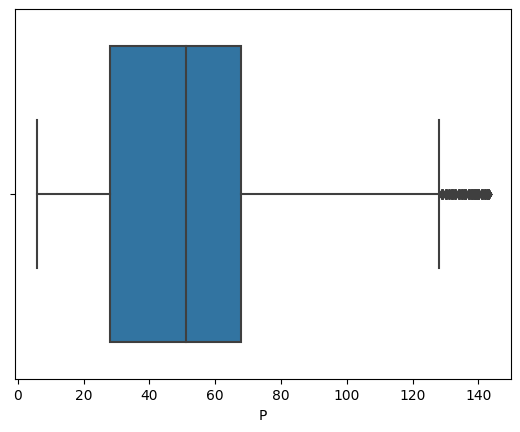

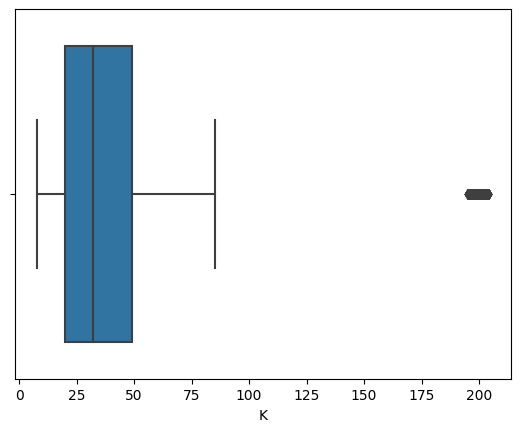

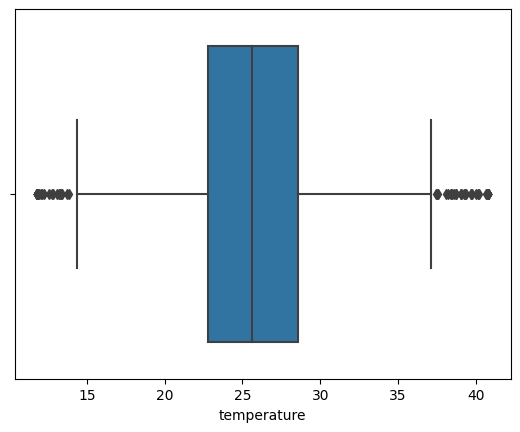

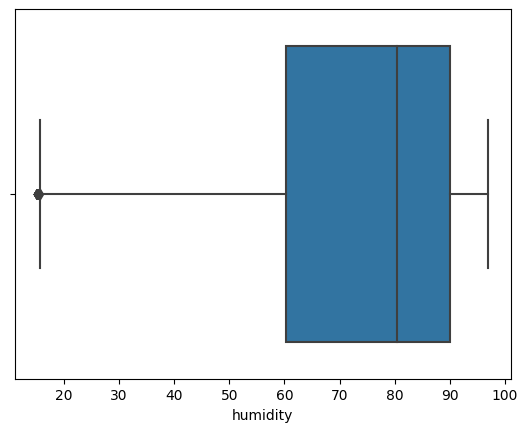

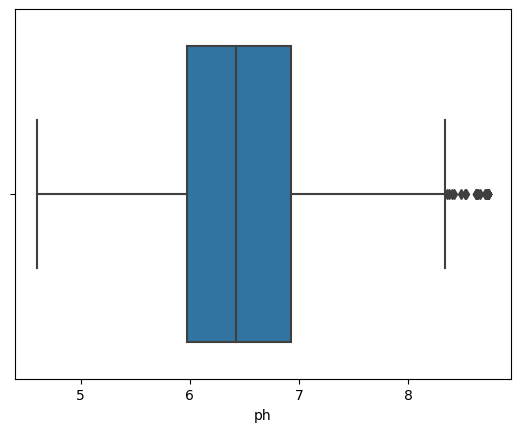

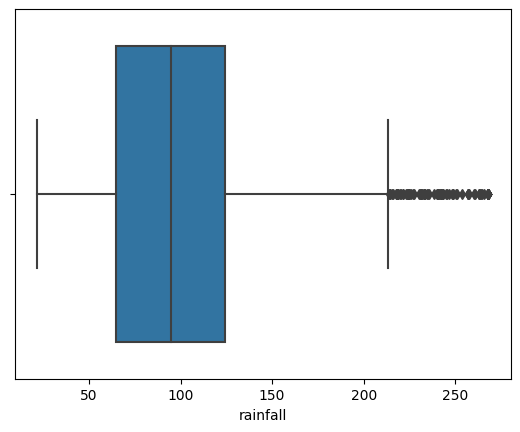

In [ ]:
sns.boxplot(x=data['N'])
plt.show()

sns.boxplot(x=data['P'])
plt.show()

sns.boxplot(x=data['K'])
plt.show()

sns.boxplot(x=data['temperature'])
plt.show()

sns.boxplot(x=data['humidity'])
plt.show()

sns.boxplot(x=data['ph'])
plt.show()

sns.boxplot(x=data['rainfall'])
plt.show()

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [ ]:
feature_importance

,feature,importance
6,rainfall,0.224698
4,humidity,0.214792
2,K,0.177658
1,P,0.152666
0,N,0.102413
3,temperature,0.074389
5,ph,0.053384


In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
data_scaled = pd.concat([X_scaled, y], axis=1)

In [ ]:
data_scaled

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.073293,-0.344981,-0.102032,-0.951277,0.473876,0.043838,1.828885,rice
1,0.937424,0.140912,-0.141562,-0.772297,0.398147,0.762826,2.264396,rice
2,0.258075,0.049807,-0.082267,-0.524338,0.488185,1.840562,2.949404,rice
3,0.638511,-0.557559,-0.161328,0.176265,0.390891,0.685305,2.561993,rice
4,0.747206,-0.344981,-0.121797,-1.101895,0.455975,1.556071,2.926510,rice
...,...,...,...,...,...,...,...,...
2195,1.535250,-0.587927,-0.319450,0.233239,-0.227552,0.416127,1.366915,coffee
2196,1.317859,-1.164925,-0.418276,0.362338,-0.667451,-0.515195,0.451645,coffee
2197,1.834163,-0.618295,-0.358980,-0.297812,-0.191023,-0.144777,1.285180,coffee
2198,1.806989,-0.648664,-0.279919,0.132324,-0.870326,0.387547,0.437887,coffee


In [ ]:
X = data_scaled.drop('label', axis=1)
y = data_scaled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9886363636363636


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


In [ ]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9659090909090909


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.975


In [ ]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=5, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9840909090909091


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9545454545454546


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9954545454545455


In [ ]:
lr = LogisticRegression(penalty='l2', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9636363636363636


In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9840909090909091


#Highest accuracy model is GaussianNB

In [ ]:
import joblib
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
joblib.dump(nb, 'Crop_model.pkl')

Accuracy: 0.9954545454545455


['Crop_model.pkl']

In [ ]:
y_pred_train = nb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9949


In [ ]:
print('Training set score: {:.4f}'.format(nb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb.score(X_test, y_test)))

Training set score: 0.9949
Test set score: 0.9955


In [ ]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.9954545454545455
Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1-score: 0.9954229797979799


<Axes: >

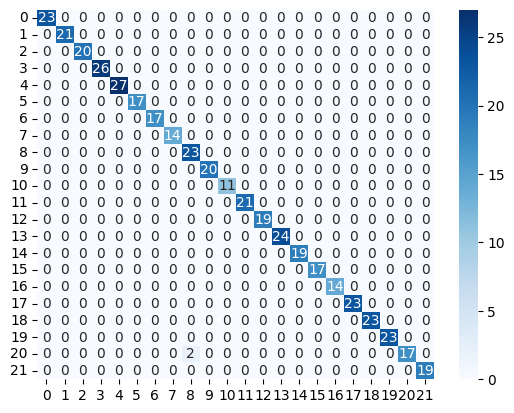

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

def crop_recommendation(N, P, K, temperature, humidity, ph, rainfall):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.naive_bayes import GaussianNB

    data = pd.read_csv("/content/drive/MyDrive/PROJECTS/Crop Recommendation system using ML/Dataset/Crop_recommendation.csv")
    X = data.drop('label', axis=1)
    y = data['label']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    nb = GaussianNB()
    nb.fit(X_scaled, y)

    input_data = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction_prob = nb.predict_proba(input_data)[0]

    prob_crop = sorted(zip(prediction_prob*100, nb.classes_), reverse=True)[:3]
    top3_crops = [f"{crop[1]} ({crop[0]:.2f}%)" for crop in prob_crop]

    return "\n".join(top3_crops)

# Create a Gradio interface
inputs = [
    gr.inputs.Slider(0, 200, default=50, label="Nitrogen"),
    gr.inputs.Slider(0, 200, default=50, label="Phosphorus"),
    gr.inputs.Slider(0, 200, default=50, label="Potassium"),
    gr.inputs.Slider(0, 50, default=25, label="Temperature"),
    gr.inputs.Slider(0, 100, default=50, label="Humidity"),
    gr.inputs.Slider(3.5, 9.0, default=6.5, label="pH"),
    gr.inputs.Slider(0, 250, default=125, label="Rainfall")
]
outputs = gr.outputs.Label()
gradio_interface = gr.Interface(fn=crop_recommendation, inputs=inputs, outputs=outputs,
                                title="Find out the most suitable crop to grow in your farm",
                                description="Enter the values of N, P, K, temperature, humidity, pH, and rainfall to get a crop recommendation.")

# Launch the interface
gradio_interface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://030cff152789581110.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
